In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.wrappers import SklearnTransformerWrapper

In [2]:
# load house prices data set from Kaggle

data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
cols = [var for var in X_train.columns if X_train[var].dtypes !='O']

cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

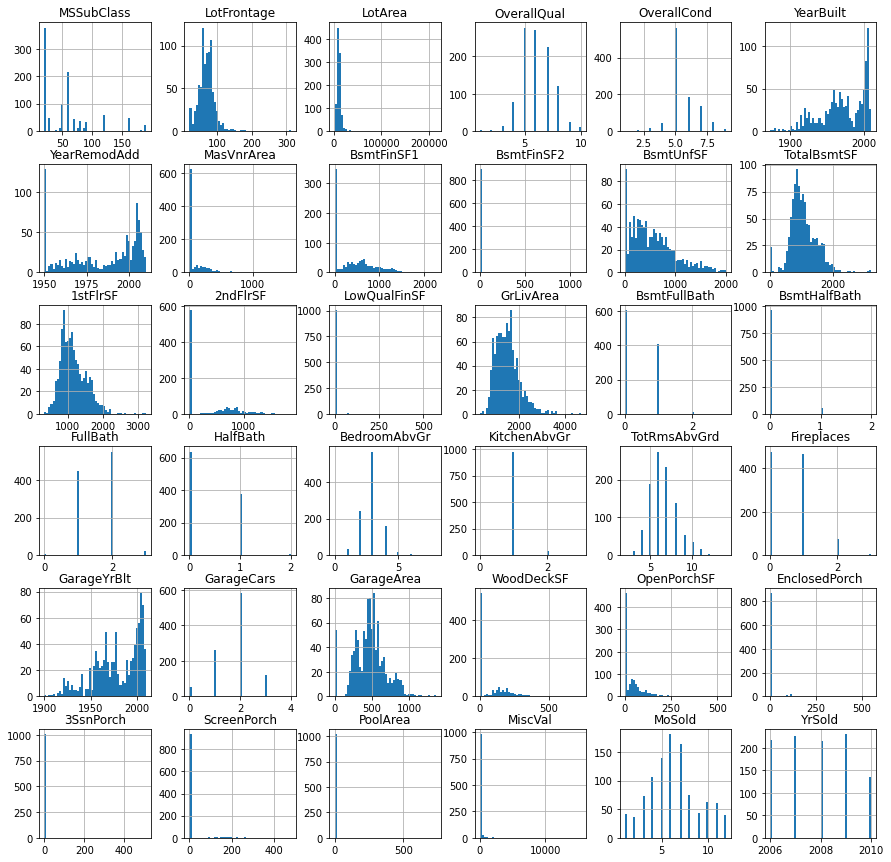

In [5]:
X_train[cols].hist(bins=50, figsize=(15,15))
plt.show()

## KBinsDiscretizer

### Equal-frequency discretization

In [6]:
variables = ['GrLivArea','GarageArea']

X_train[variables].isnull().mean()

GrLivArea     0.0
GarageArea    0.0
dtype: float64

In [7]:
# at the moment it only works if the encoding in kbinsdiscretizer
# is set to 'ordinal'

discretizer = SklearnTransformerWrapper(
    transformer = KBinsDiscretizer(
        n_bins=5, strategy='quantile', encode='ordinal'),
    variables = variables,
)

discretizer.fit(X_train)

SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal'),
                          variables=['GrLivArea', 'GarageArea'])

In [8]:
discretizer.variables

['GrLivArea', 'GarageArea']

In [9]:
discretizer.transformer

KBinsDiscretizer(encode='ordinal')

In [10]:
# we can find the mean values within the parameters of the
# simple imputer

discretizer.transformer.bin_edges_

array([array([ 334. , 1069.6, 1344. , 1603.2, 1893. , 4676. ]),
       array([   0. ,  292.4,  438. ,  513. ,  618.6, 1356. ])],
      dtype=object)

In [11]:
# remove NA

X_train = discretizer.transform(X_train)
X_test = discretizer.transform(X_test)

In [12]:
X_test['GrLivArea'].value_counts(normalize=True)

2.0    0.235160
0.0    0.207763
1.0    0.207763
4.0    0.182648
3.0    0.166667
Name: GrLivArea, dtype: float64

In [13]:
X_test['GarageArea'].value_counts(normalize=True)

3.0    0.212329
4.0    0.205479
2.0    0.203196
0.0    0.189498
1.0    0.189498
Name: GarageArea, dtype: float64

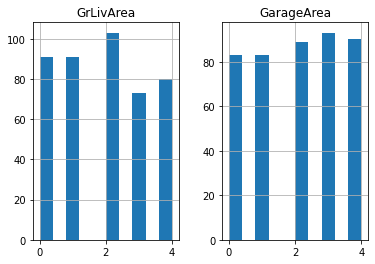

In [14]:
X_test[variables].hist()
plt.show()